# The stochastic volatility model

Let the observed logarithmic price of an asset be denoted by $A_{t}$ at time $t\in\mathbb{N}$. We assume a simple dynamics:
\begin{equation}\label{eq:logprice}
	A_t=\mu t +S_t,
\end{equation} 
where $\mu\in\mathbb{R}$, $S_{0}\in\mathbb{R}$ are constants and $S_{t}:=S_{0}+\sum_{j=1}^{t}X_{j}$.

We assume that the time evolution of $(X_t)_{t\in\mathbb{N}}$ can be described by the stochastic volatility model 
\begin{align}
X_{t} &= \sigma_t\varepsilon_t^X \mathbf{1}_{\sigma_t\varepsilon_t^X\le M}+M\mathbf{1}_{\sigma_t\varepsilon_t^X> M} -M\left(1-\Phi\left(\frac{M}{\sigma_t}\right)\right)+\frac{|\sigma_t|}{\sqrt{2\pi}}e^{-\frac{M^2}{2\sigma_t^2}},\quad t\ge 0\\
\sigma_{t} &= \rho \sigma_{t-1} + \varepsilon_{t}^\sigma,\quad t\ge 1,\quad\sigma_0\sim\mathcal{N}\left(0,\frac{1}{1-\rho^2}\right)
\end{align}
where $(\varepsilon_t^X)_{t\in\mathbb{N}}$ and $(\varepsilon_t^\sigma)_{t\in\mathbb{N}}$ are i.i.d. sequences of standard Gaussian random variables, independent of each other, $M>0$ is fixed, and $\rho$ is varying between -1 and 1. 

Note that, for large $M$, $X_{t}\approx\sigma_t\varepsilon_t^X$, moreover $\mathbb{E}(X_t|\sigma_t)=0$, $\mathbb{E}(|X_t||\sigma_t)<\infty$, and also $\mathbb{E}(|X_t|)<\infty$.

In [9]:
import blsh

# Path simulation

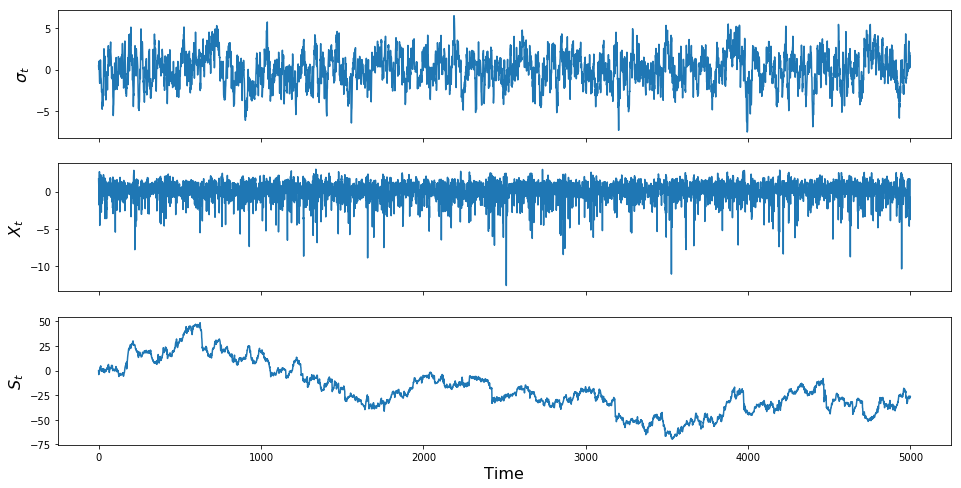

In [30]:
import matplotlib.pyplot as plt 
import blsh

rho = 0.85 # correlation in the stochastic volatility process
M = 1  # Maximum allowed daily log-return

sigma = blsh.AR1_stac(rho)
X = blsh.log_return(sigma, M)
S = blsh.random_walk(X, 0.0)

T = 5000

fig, axs = plt.subplots(3, sharex=True, sharey=False, figsize=(16,8))
axs[0].plot([next(sigma) for i in range(T)])
axs[1].plot([next(X) for i in range(T)])
axs[2].plot([next(S) for i in range(T)])

plt.xlabel("Time",fontsize=16);
axs[0].set_ylabel("$\sigma_t$",fontsize=16);
axs[1].set_ylabel("$X_t$",fontsize=16);
axs[2].set_ylabel("$S_t$",fontsize=16);

plt.savefig('./rho_X_S_paths.eps', format='eps')

# Trading with fixed thresholds

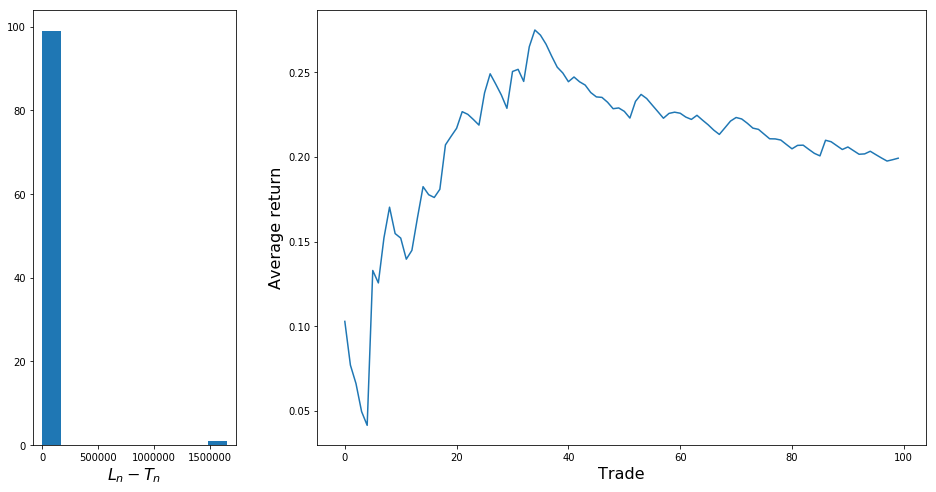

In [31]:
from blsh import get_trader

rho = 0.1 # correlation in the stochastic volatility process
trader = get_trader(rho)

ntrades = 100

th_low, th_high = -1, 1  # fixed thresholds
waiting_time = []
daily_returns = []

for i in range(ntrades):
    t, r = trader(th_low, th_high)
    waiting_time.append(t)
    daily_returns.append(r)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8),gridspec_kw={'width_ratios': [1, 3]})

ax1.hist(waiting_time)
ax2.plot(np.cumsum(daily_returns)/np.linspace(1,ntrades,ntrades))

ax1.set_xlabel(r"$L_n-T_n$",fontsize=16);
ax2.set_xlabel("Trade",fontsize=16);
ax2.set_ylabel("Average return",fontsize=16);

plt.savefig('./return_lln.eps', format='eps')

In [1]:
import numpy as np 
from blsh import get_trader

rho=np.arange(-0.9,1.0,0.2)
ret = np.zeros_like(rho)

ntrades = 30
th_low, th_high = -1, 1  # fixed thresholds

for i, r in enumerate(rho):
    trader = get_trader(r)
    
    for j in range(ntrades):
        _, retval = trader(th_low, th_high)
        ret[i] = ret[i] + retval

ret = ret/ntrades

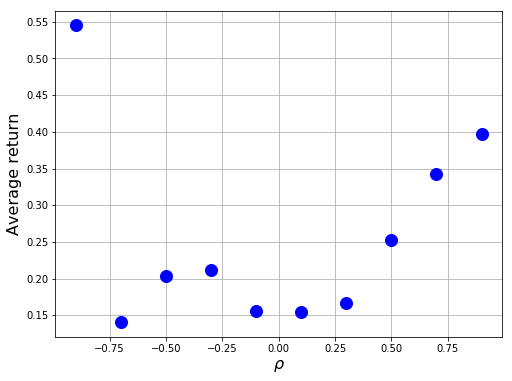

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
plt.plot(rho, ret, 'bo', markersize=12)

plt.xlabel(r"$\rho$", fontsize=16);
plt.ylabel("Average return", fontsize=16);
plt.grid(visible=True)
plt.savefig('./rho_return.eps', format='eps')

# Threshold optimization

In [1]:
from blsh import find_optimal_theta as optimizer

th = optimizer(0.1)

In [1]:
from blsh import find_optimal_theta as optimizer

rho=[-0.9, -0.5, 0.0, 0.5, 0.9]
th = []

for r in rho:
    th.append(optimizer(r))

KeyboardInterrupt: 

In [5]:
optimizer(0.95)

array([-0.43355731,  1.0650065 ])

In [8]:
rho=[-0.9, -0.5, 0.0, 0.5, 0.9]
th = []

In [15]:
th.append(optimizer(rho[4]))

In [16]:
th

[array([0.09132192, 1.9559819 ]),
 array([-1.08036325,  2.56127326]),
 array([-1.05585326,  0.73269225]),
 array([-1.02463116,  0.87002915]),
 array([1.17118665, 3.09098241])]